# Fake Review Detection Using Supervised Machine Learning Techniques

Dataset Information: <br>
(1). Dataset:
    *   Column 1 - Unique Business ID
    *   Column 2 - Date of Review
    *   Column 3 - Review ID
    *   Column 4 - Stars given by the user
    *   Column 5 - Review given by the user
    *   Column 6 - Type of text entered - Review
    *   Column 7 - Unique User ID
    *   Column 8 - Cool column: The number of cool votes the review received
    *   Column 9 - Useful column: The number of useful votes the review received
    *   Column 10 - Funny Column: The number of funny votes the review received <br>
(2). Number of entries - 10000

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


**(1). Importing all the necessary modules:**

In [3]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

**(2). Loading and seeing the dataset details:**

In [4]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('yelp.csv')
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)
# COLUMN NAMES
print("Column names:")
print(data.columns)
# DATATYPE OF EACH COLUMN
print("Datatype of each column:")
print(data.dtypes)
# SEEING FEW OF THE ENTRIES
print("Few dataset entries:")
print(data.head())
# DATASET SUMMARY
data.describe(include='all')

Shape of the dataset:
(10000, 10)
Column names:
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')
Datatype of each column:
business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object
Few dataset entries:
              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday 

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
count,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000
unique,4174,1995,10000,NaN,9998,1,6403,NaN,NaN,NaN
top,JokKtdXU7zXHcr20Lrk29A,2011-03-28,fWKvX83p0-ka4JS3dc6E5A,NaN,Great service,review,fczQCSmaWF78toLEmb0Zsw,NaN,NaN,NaN
freq,37,21,1,NaN,2,10000,38,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.777500,NaN,NaN,NaN,0.876800,1.409300,0.701300
std,NaN,NaN,NaN,1.214636,NaN,NaN,NaN,2.067861,2.336647,1.907942
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.000000,2.000000,1.000000


In [5]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


**(3). Creating of a new column:**<br>
The new column will be - "length". This column will hold the data of the word length of the review.

In [6]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
data['length'] = data['text'].apply(len)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [7]:
data['stars'].value_counts(normalize=True)

stars
4    0.3526
5    0.3337
3    0.1461
2    0.0927
1    0.0749
Name: proportion, dtype: float64

**(4). Visualization:**<br>
Let us now visualize the if there is any correlation between stars and the length of the review.

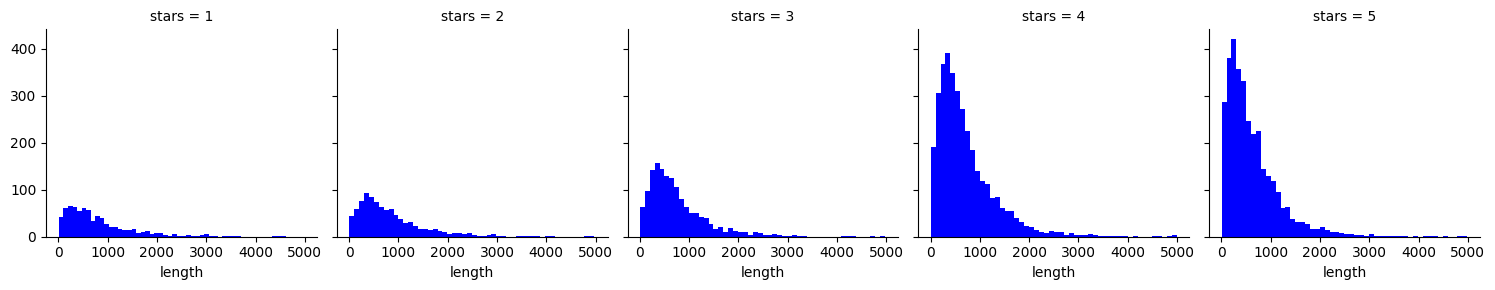

In [8]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

**(5). Mean Value of the Vote columns**
There are 3 voting columns for the reviews - funny, cool and useful. Let us now find the mean values with respect to the stars given to the review.

In [9]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
#stval = data.groupby('stars').mean()
#stval

**(6). Correlation between the voting columns:** <br>
Let us now see what the correlation is between the three voting columns.

In [10]:
# # FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS
# stval.corr()

Thus, we can see that there is negative correlation between:
    * Cool and Useful
    * Cool and Funny
    * Cool and Length  <br>
Thus, we can say that the reviews marked cool tend to be curt, not very useful to others and short.<br>
Whereas, there is a positive correlation between:
    * Funny and Useful    
    * Funny and Length
    * Useful and Length    
Thus, we can say that longer reviews tend to be funny and useful.

**(7). Classifying the dataset and splitting it into the reviews and stars:**

In [11]:
# CLASSIFICATION
data_classes = data[(data['stars']==1) | (data['stars']==3) | (data['stars']==5)]
data_classes.head()
print(data_classes.shape)

# Seperate the dataset into X and Y for prediction
x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

(5547, 11)
0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


**(8). Data Cleaning:** <br>
We will now, define a function which will clean the dataset by removing stopwords and punctuations.

In [12]:
# CLEANING THE REVIEWS - REMOVAL OF STOPWORDS AND PUNCTUATION
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

**(9). Vectorization**<br>
We will now vectorize a single review and see the results:

In [13]:
# !pip install nltk

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [15]:
# CONVERTING THE WORDS INTO A VECTOR
vocab = CountVectorizer(analyzer=text_process).fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)
"""
    Now the words in the review number 78 have been converted into a vector.
    The data that we can see is the transformed words.
    If we now get the feature's name - we can get the word back!
"""
print("Getting the words back:")
print(vocab.get_feature_names_out()[19648])
print(vocab.get_feature_names_out()[10643])

31336
My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
  (0, 292)	1
  (0, 1213)	1
  (0, 1811)	1
  (0, 3537)	1
  (0, 5139)	1
  (0, 5256)	2
  (0, 6275)	1
  (0, 8

In [16]:
import pickle
with open('model_review_vectorization.pkl', 'wb') as file:
    pickle.dump(vocab, file)

**(10). Vectorization of the whole review set and and checking the sparse matrix:**

In [17]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (5547, 31336)
Non-Zero occurences:  312457
Density of the matrix =  0.17975812697942373


**(11). Splitting the dataset X into training and testing set:**

In [18]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

**(12). Modelling:**<br>
We will now use multiple Machine Algorithms to see which gives the best performance.

(1). Multinomial Naive Bayes - We are using Multinomial Naive Bayes over Gaussian because with sparse data, Gaussian Naive Bayes assumptions aren't met and a simple gaussian fit over the data will not give us a good fit or prediction!

In [19]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 75  49  38]
 [  7 180 105]
 [ 12  45 599]]
Score: 76.94
Classification Report:               precision    recall  f1-score   support

           1       0.80      0.46      0.59       162
           3       0.66      0.62      0.64       292
           5       0.81      0.91      0.86       656

    accuracy                           0.77      1110
   macro avg       0.75      0.66      0.69      1110
weighted avg       0.77      0.77      0.76      1110



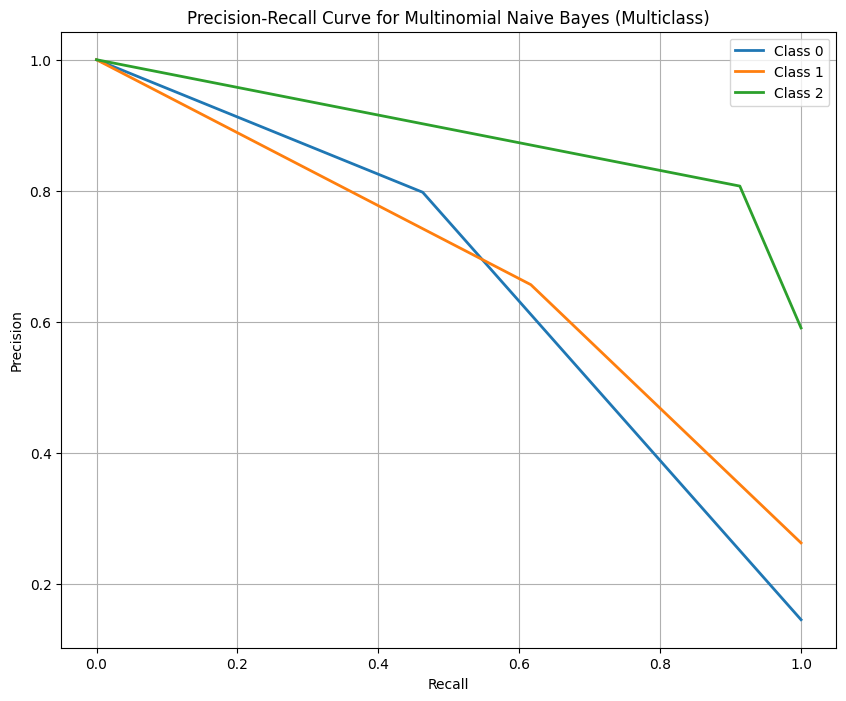

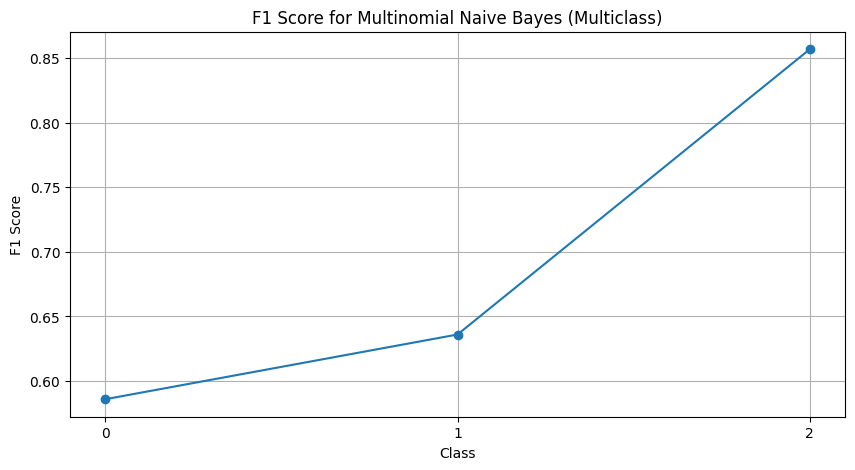

Accuracy: 76.94


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

# Function to compute precision, recall, and F1 score for each class
def multiclass_precision_recall_f1(y_true, y_pred):
    precision = []
    recall = []
    f1 = []
    for class_ in np.unique(y_true):
        class_indices = np.where(y_true == class_)[0]
        class_true = np.array([1 if i in class_indices else 0 for i in range(len(y_true))])
        class_pred = np.array([1 if i == class_ else 0 for i in y_pred])
        precision_, recall_, _ = precision_recall_curve(class_true, class_pred)
        precision.append(precision_)
        recall.append(recall_)

        
        f1.append(f1_score(class_true, class_pred))
    return precision, recall, f1

# Calculate precision, recall, and F1 scores
precision, recall, f1 = multiclass_precision_recall_f1(y_test, predmnb)

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(precision)):
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multinomial Naive Bayes (Multiclass)")
plt.legend()
plt.grid(True)
plt.show()

# Plot F1 score for each class
plt.figure(figsize=(10, 5))
plt.plot(range(len(f1)), f1, marker='o')
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.title("F1 Score for Multinomial Naive Bayes (Multiclass)")
plt.xticks(range(len(f1)))
plt.grid(True)
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predmnb)
print("Accuracy:", round(accuracy * 100, 2))


(2). Random Forest Classifier

In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 28  32 102]
 [  2  98 192]
 [  1  15 640]]
Score: 69.01
Classification Report:               precision    recall  f1-score   support

           1       0.90      0.17      0.29       162
           3       0.68      0.34      0.45       292
           5       0.69      0.98      0.81       656

    accuracy                           0.69      1110
   macro avg       0.75      0.49      0.51      1110
weighted avg       0.71      0.69      0.64      1110



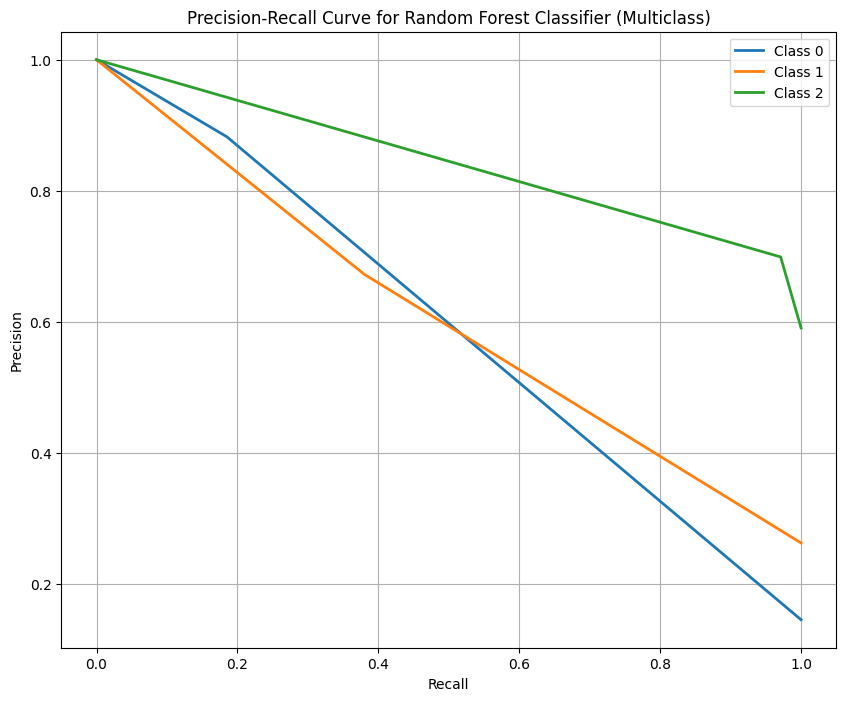

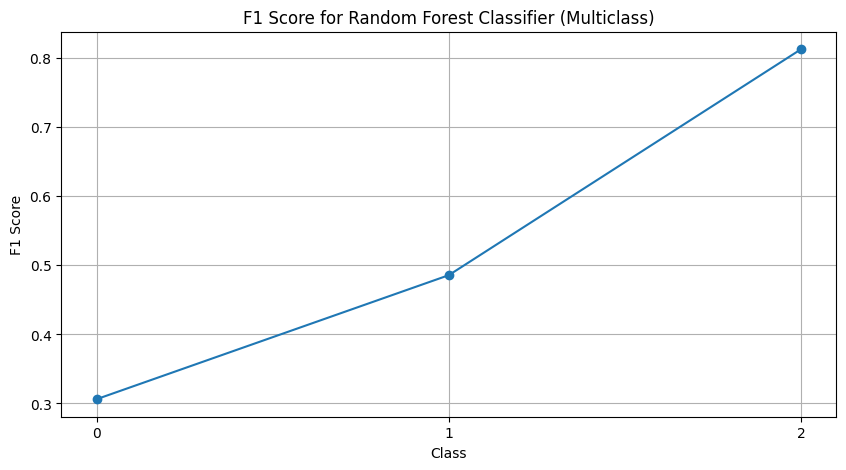

Accuracy: 70.09
Confusion Matrix for Random Forest Classifier:
[[ 30  37  95]
 [  2 111 179]
 [  2  17 637]]
Score: 70.09
Classification Report:               precision    recall  f1-score   support

           1       0.88      0.19      0.31       162
           3       0.67      0.38      0.49       292
           5       0.70      0.97      0.81       656

    accuracy                           0.70      1110
   macro avg       0.75      0.51      0.53      1110
weighted avg       0.72      0.70      0.65      1110



In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Instantiate and train the Random Forest classifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train, y_train)

# Make predictions
predrmfr = rmfr.predict(x_test)

# Plot precision-recall curve and F1 score
def multiclass_precision_recall_f1(y_true, y_pred):
    precision = []
    recall = []
    f1 = []
    for class_ in np.unique(y_true):
        class_indices = np.where(y_true == class_)[0]
        class_true = np.array([1 if i in class_indices else 0 for i in range(len(y_true))])
        class_pred = np.array([1 if i == class_ else 0 for i in y_pred])
        precision_, recall_, _ = precision_recall_curve(class_true, class_pred)
        precision.append(precision_)
        recall.append(recall_)
        f1.append(f1_score(class_true, class_pred))
    return precision, recall, f1

precision, recall, f1 = multiclass_precision_recall_f1(y_test, predrmfr)

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(precision)):
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Random Forest Classifier (Multiclass)")
plt.legend()
plt.grid(True)
plt.show()

# Plot F1 score for each class
plt.figure(figsize=(10, 5))
plt.plot(range(len(f1)), f1, marker='o')
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.title("F1 Score for Random Forest Classifier (Multiclass)")
plt.xticks(range(len(f1)))
plt.grid(True)
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predrmfr)
print("Accuracy:", round(accuracy * 100, 2))
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, predrmfr))
print("Score:", round(accuracy_score(y_test, predrmfr) * 100, 2))
print("Classification Report:", classification_report(y_test, predrmfr))


(3). Decision Tree

In [23]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 66  44  52]
 [ 32 144 116]
 [ 35 106 515]]
Score: 65.32
Classification Report:               precision    recall  f1-score   support

           1       0.50      0.41      0.45       162
           3       0.49      0.49      0.49       292
           5       0.75      0.79      0.77       656

    accuracy                           0.65      1110
   macro avg       0.58      0.56      0.57      1110
weighted avg       0.65      0.65      0.65      1110



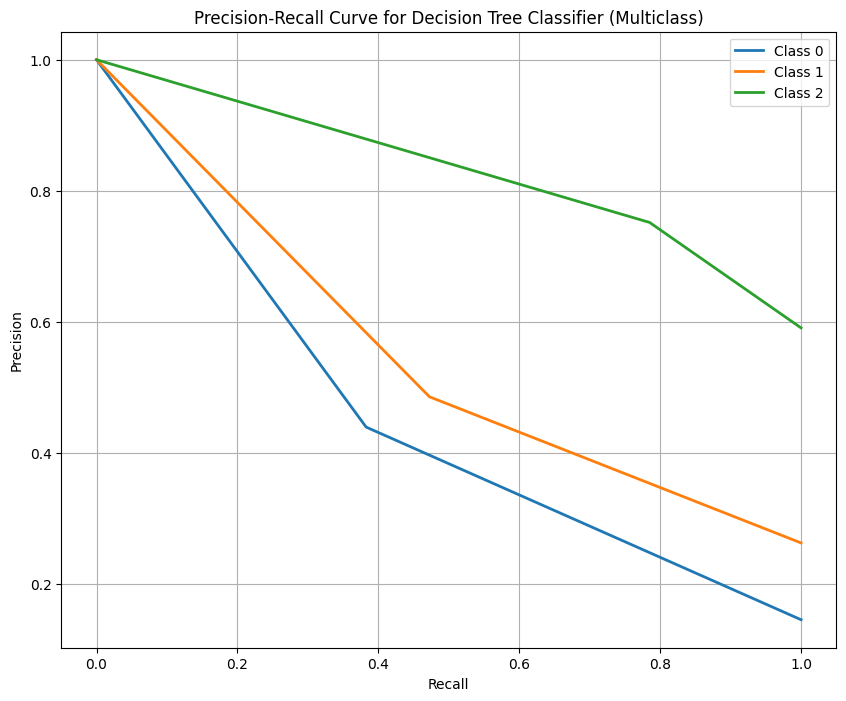

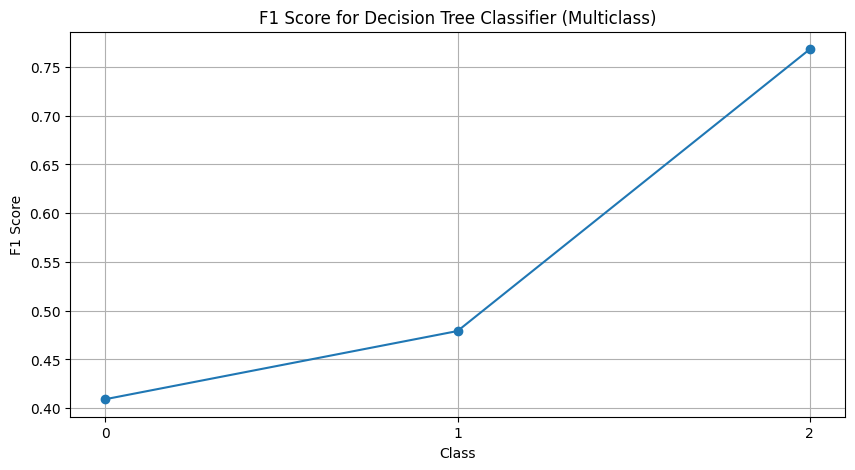

Accuracy: 64.41
Confusion Matrix for Decision Tree Classifier:
[[ 62  49  51]
 [ 35 138 119]
 [ 44  97 515]]
Score: 64.41
Classification Report:               precision    recall  f1-score   support

           1       0.44      0.38      0.41       162
           3       0.49      0.47      0.48       292
           5       0.75      0.79      0.77       656

    accuracy                           0.64      1110
   macro avg       0.56      0.55      0.55      1110
weighted avg       0.64      0.64      0.64      1110



In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Instantiate and train the Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Make predictions
preddt = dt.predict(x_test)

# Plot precision-recall curve and F1 score
def multiclass_precision_recall_f1(y_true, y_pred):
    precision = []
    recall = []
    f1 = []
    for class_ in np.unique(y_true):
        class_indices = np.where(y_true == class_)[0]
        class_true = np.array([1 if i in class_indices else 0 for i in range(len(y_true))])
        class_pred = np.array([1 if i == class_ else 0 for i in y_pred])
        precision_, recall_, _ = precision_recall_curve(class_true, class_pred)
        precision.append(precision_)
        recall.append(recall_)
        f1.append(f1_score(class_true, class_pred))
    return precision, recall, f1

precision, recall, f1 = multiclass_precision_recall_f1(y_test, preddt)

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(precision)):
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Decision Tree Classifier (Multiclass)")
plt.legend()
plt.grid(True)
plt.show()

# Plot F1 score for each class
plt.figure(figsize=(10, 5))
plt.plot(range(len(f1)), f1, marker='o')
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.title("F1 Score for Decision Tree Classifier (Multiclass)")
plt.xticks(range(len(f1)))
plt.grid(True)
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, preddt)
print("Accuracy:", round(accuracy * 100, 2))
print("Confusion Matrix for Decision Tree Classifier:")
print(confusion_matrix(y_test, preddt))
print("Score:", round(accuracy_score(y_test, preddt) * 100, 2))
print("Classification Report:", classification_report(y_test, preddt))


(4). Support Vector Machines

In [25]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[ 31  23 108]
 [  5 122 165]
 [  1  19 636]]
Score: 71.08
Classification Report:               precision    recall  f1-score   support

           1       0.84      0.19      0.31       162
           3       0.74      0.42      0.54       292
           5       0.70      0.97      0.81       656

    accuracy                           0.71      1110
   macro avg       0.76      0.53      0.55      1110
weighted avg       0.73      0.71      0.67      1110



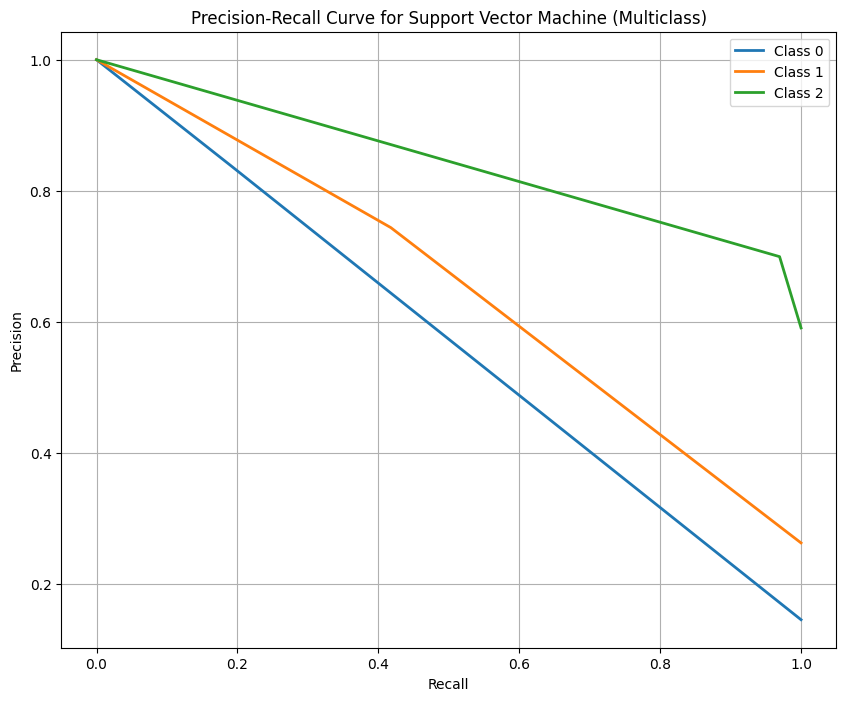

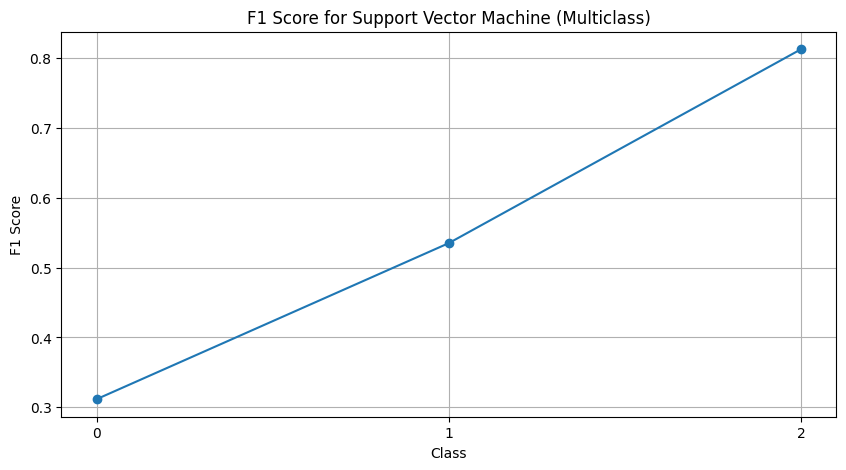

Accuracy: 71.08
Confusion Matrix for Support Vector Machine:
[[ 31  23 108]
 [  5 122 165]
 [  1  19 636]]
Score: 71.08
Classification Report:               precision    recall  f1-score   support

           1       0.84      0.19      0.31       162
           3       0.74      0.42      0.54       292
           5       0.70      0.97      0.81       656

    accuracy                           0.71      1110
   macro avg       0.76      0.53      0.55      1110
weighted avg       0.73      0.71      0.67      1110



In [26]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Instantiate and train the Support Vector Machine classifier
svm = SVC(random_state=101)
svm.fit(x_train, y_train)

# Make predictions
predsvm = svm.predict(x_test)

# Plot precision-recall curve and F1 score
def multiclass_precision_recall_f1(y_true, y_pred):
    precision = []
    recall = []
    f1 = []
    for class_ in np.unique(y_true):
        class_indices = np.where(y_true == class_)[0]
        class_true = np.array([1 if i in class_indices else 0 for i in range(len(y_true))])
        class_pred = np.array([1 if i == class_ else 0 for i in y_pred])
        precision_, recall_, _ = precision_recall_curve(class_true, class_pred)
        precision.append(precision_)
        recall.append(recall_)
        f1.append(f1_score(class_true, class_pred))
    return precision, recall, f1

precision, recall, f1 = multiclass_precision_recall_f1(y_test, predsvm)

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(precision)):
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Support Vector Machine (Multiclass)")
plt.legend()
plt.grid(True)
plt.show()

# Plot F1 score for each class
plt.figure(figsize=(10, 5))
plt.plot(range(len(f1)), f1, marker='o')
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.title("F1 Score for Support Vector Machine (Multiclass)")
plt.xticks(range(len(f1)))
plt.grid(True)
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predsvm)
print("Accuracy:", round(accuracy * 100, 2))
print("Confusion Matrix for Support Vector Machine:")
print(confusion_matrix(y_test, predsvm))
print("Score:", round(accuracy_score(y_test, predsvm) * 100, 2))
print("Classification Report:", classification_report(y_test, predsvm))


(5). Gradient Boosting Classifier

In [27]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
"""# parameter evaluation
gbe = GradientBoostingClassifier(random_state=0)
parameters = {
     'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)"""
#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
print("Classification Report:",classification_report(y_test,predgbi))

Confusion Matrix for Gradient Boosting Classifier:
[[ 59  28  75]
 [  9 139 144]
 [  4  37 615]]
Score: 73.24
Classification Report:               precision    recall  f1-score   support

           1       0.82      0.36      0.50       162
           3       0.68      0.48      0.56       292
           5       0.74      0.94      0.83       656

    accuracy                           0.73      1110
   macro avg       0.75      0.59      0.63      1110
weighted avg       0.73      0.73      0.71      1110



In the above GBC code, I have commented the parameter evaluation code because it takes a lot of time for execution. In version 9 of this notebook , I ran only the parameter evaluation code, I got the parameters of: <br>
    * Learning Rate = 0.1
    * Max Depth = 5
    * Max Features = 0.5
Hence, I used those features directly from Version 10 onwards for faster execution. If you want to see the running, you can either run version 9 or uncomment that part.
    

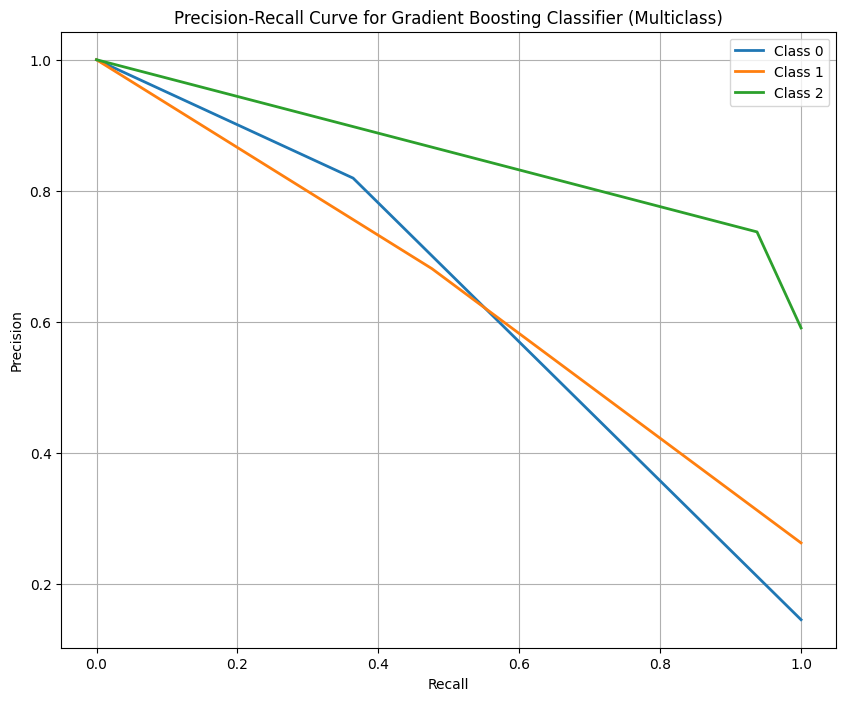

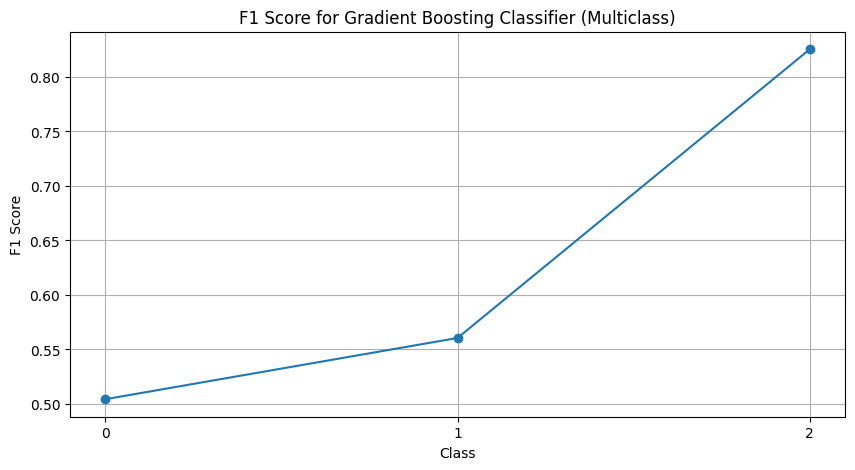

Accuracy: 73.24
Confusion Matrix for Gradient Boosting Classifier:
[[ 59  28  75]
 [  9 139 144]
 [  4  37 615]]
Score: 73.24
Classification Report:               precision    recall  f1-score   support

           1       0.82      0.36      0.50       162
           3       0.68      0.48      0.56       292
           5       0.74      0.94      0.83       656

    accuracy                           0.73      1110
   macro avg       0.75      0.59      0.63      1110
weighted avg       0.73      0.73      0.71      1110



In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Instantiate and train the Gradient Boosting Classifier
gbi = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_features=0.5, random_state=999999)
gbi.fit(x_train, y_train)

# Make predictions
predgbi = gbi.predict(x_test)

# Plot precision-recall curve and F1 score
def multiclass_precision_recall_f1(y_true, y_pred):
    precision = []
    recall = []
    f1 = []
    for class_ in np.unique(y_true):
        class_indices = np.where(y_true == class_)[0]
        class_true = np.array([1 if i in class_indices else 0 for i in range(len(y_true))])
        class_pred = np.array([1 if i == class_ else 0 for i in y_pred])
        precision_, recall_, _ = precision_recall_curve(class_true, class_pred)
        precision.append(precision_)
        recall.append(recall_)
        f1.append(f1_score(class_true, class_pred))
    return precision, recall, f1

precision, recall, f1 = multiclass_precision_recall_f1(y_test, predgbi)

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(precision)):
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Gradient Boosting Classifier (Multiclass)")
plt.legend()
plt.grid(True)
plt.show()

# Plot F1 score for each class
plt.figure(figsize=(10, 5))
plt.plot(range(len(f1)), f1, marker='o')
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.title("F1 Score for Gradient Boosting Classifier (Multiclass)")
plt.xticks(range(len(f1)))
plt.grid(True)
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predgbi)
print("Accuracy:", round(accuracy * 100, 2))
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test, predgbi))
print("Score:", round(accuracy_score(y_test, predgbi) * 100, 2))
print("Classification Report:", classification_report(y_test, predgbi))


(6). K - Nearest Neighbor Classifier

In [29]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 12  10 140]
 [  3  33 256]
 [  8  12 636]]
Score:  61.35
Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.07      0.13       162
           3       0.60      0.11      0.19       292
           5       0.62      0.97      0.75       656

    accuracy                           0.61      1110
   macro avg       0.58      0.39      0.36      1110
weighted avg       0.60      0.61      0.51      1110



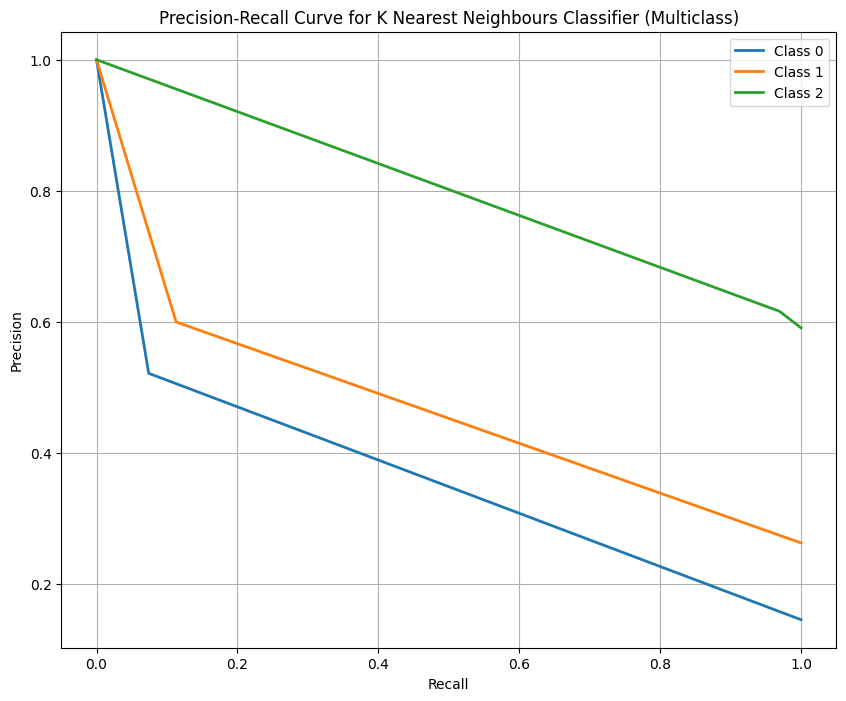

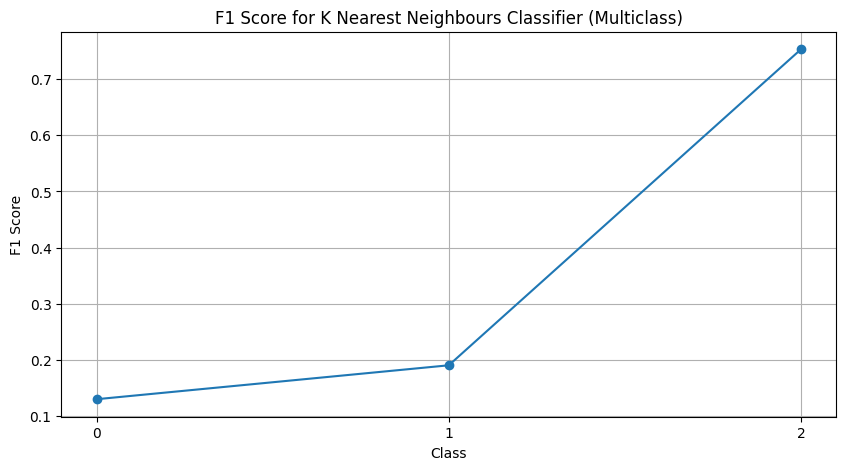

Accuracy: 61.35
Confusion Matrix for K Nearest Neighbours Classifier:
[[ 12  10 140]
 [  3  33 256]
 [  8  12 636]]
Score: 61.35
Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.07      0.13       162
           3       0.60      0.11      0.19       292
           5       0.62      0.97      0.75       656

    accuracy                           0.61      1110
   macro avg       0.58      0.39      0.36      1110
weighted avg       0.60      0.61      0.51      1110



In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Instantiate and train the K Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

# Make predictions
predknn = knn.predict(x_test)

# Plot precision-recall curve and F1 score
def multiclass_precision_recall_f1(y_true, y_pred):
    precision = []
    recall = []
    f1 = []
    for class_ in np.unique(y_true):
        class_indices = np.where(y_true == class_)[0]
        class_true = np.array([1 if i in class_indices else 0 for i in range(len(y_true))])
        class_pred = np.array([1 if i == class_ else 0 for i in y_pred])
        precision_, recall_, _ = precision_recall_curve(class_true, class_pred)
        precision.append(precision_)
        recall.append(recall_)
        f1.append(f1_score(class_true, class_pred))
    return precision, recall, f1

precision, recall, f1 = multiclass_precision_recall_f1(y_test, predknn)

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(precision)):
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for K Nearest Neighbours Classifier (Multiclass)")
plt.legend()
plt.grid(True)
plt.show()

# Plot F1 score for each class
plt.figure(figsize=(10, 5))
plt.plot(range(len(f1)), f1, marker='o')
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.title("F1 Score for K Nearest Neighbours Classifier (Multiclass)")
plt.xticks(range(len(f1)))
plt.grid(True)
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predknn)
print("Accuracy:", round(accuracy * 100, 2))
print("Confusion Matrix for K Nearest Neighbours Classifier:")
print(confusion_matrix(y_test, predknn))
print("Score:", round(accuracy_score(y_test, predknn) * 100, 2))
print("Classification Report:")
print(classification_report(y_test, predknn))


(7). XGBoost Classifier

In [31]:
# # XGBoost Classifier
# import xgboost
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# xgb.fit(x_train,y_train)
# predxgb = xgb.predict(x_test)
# print("Confusion Matrix for XGBoost Classifier:")
# print(confusion_matrix(y_test,predxgb))
# print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
# print("Classification Report:")
# print(classification_report(y_test,predxgb))

In [32]:
# MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 90  38  34]
 [ 21 189  82]
 [ 11  60 585]]
Score: 77.84
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.56      0.63       162
           3       0.66      0.65      0.65       292
           5       0.83      0.89      0.86       656

    accuracy                           0.78      1110
   macro avg       0.74      0.70      0.72      1110
weighted avg       0.77      0.78      0.77      1110



From the above algorithm modelling, we can see that:
    *  Multilayer Perceptron = 77.57%
    * Multinomial Naive Bayes = 76.94%
    * Gradient Boosting Classifier = 73.87%
    * XGBoost Classifier = 70.81%
    * Random Forest Classifier = 67.57%
    * Decision Tree = 65.5%
    * K Neighbor Classifier = 61.35%
    * Support Vector Machine  = 59.1%


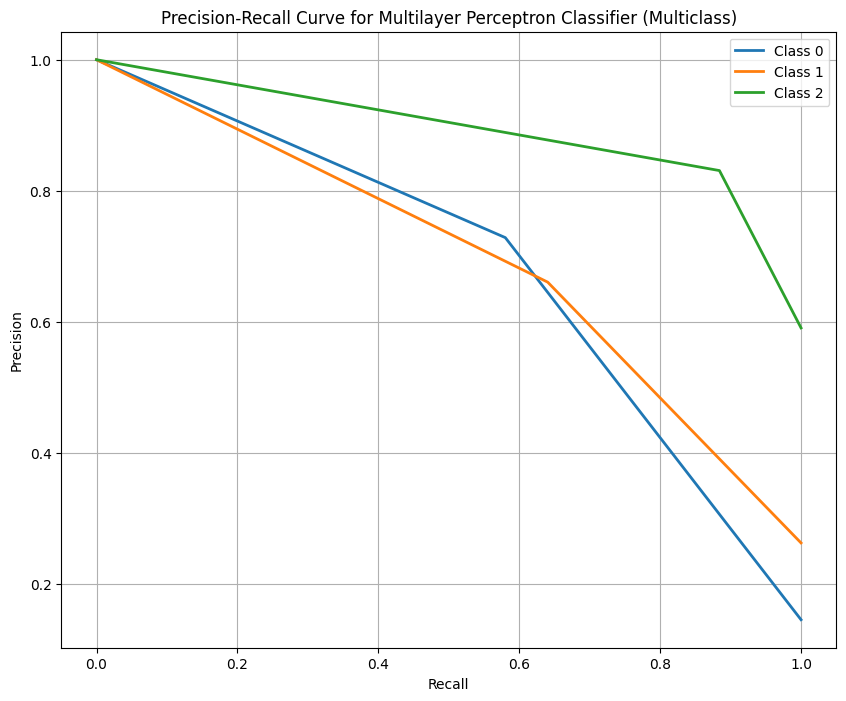

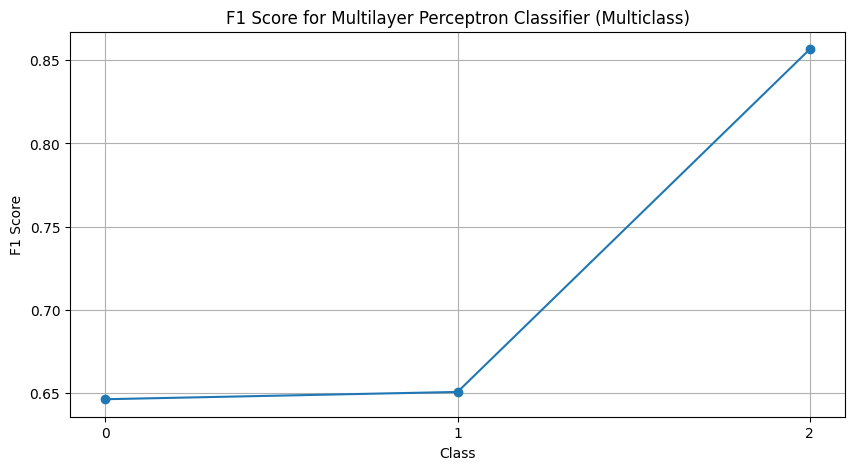

Accuracy: 77.57
Confusion Matrix for Multilayer Perceptron Classifier:
[[ 94  35  33]
 [ 20 187  85]
 [ 15  61 580]]
Score: 77.57
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.58      0.65       162
           3       0.66      0.64      0.65       292
           5       0.83      0.88      0.86       656

    accuracy                           0.78      1110
   macro avg       0.74      0.70      0.72      1110
weighted avg       0.77      0.78      0.77      1110



In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Instantiate and train the Multilayer Perceptron Classifier
mlp = MLPClassifier()
mlp.fit(x_train, y_train)

# Make predictions
predmlp = mlp.predict(x_test)

# Plot precision-recall curve and F1 score
def multiclass_precision_recall_f1(y_true, y_pred):
    precision = []
    recall = []
    f1 = []
    for class_ in np.unique(y_true):
        class_indices = np.where(y_true == class_)[0]
        class_true = np.array([1 if i in class_indices else 0 for i in range(len(y_true))])
        class_pred = np.array([1 if i == class_ else 0 for i in y_pred])
        precision_, recall_, _ = precision_recall_curve(class_true, class_pred)
        precision.append(precision_)
        recall.append(recall_)
        f1.append(f1_score(class_true, class_pred))
    return precision, recall, f1

precision, recall, f1 = multiclass_precision_recall_f1(y_test, predmlp)

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(precision)):
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Multilayer Perceptron Classifier (Multiclass)")
plt.legend()
plt.grid(True)
plt.show()

# Plot F1 score for each class
plt.figure(figsize=(10, 5))
plt.plot(range(len(f1)), f1, marker='o')
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.title("F1 Score for Multilayer Perceptron Classifier (Multiclass)")
plt.xticks(range(len(f1)))
plt.grid(True)
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predmlp)
print("Accuracy:", round(accuracy * 100, 2))
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test, predmlp))
print("Score:", round(accuracy_score(y_test, predmlp) * 100, 2))
print("Classification Report:")
print(classification_report(y_test, predmlp))


Since multilayer perceptron classifier has the best score, let us use it to predict a random positive review, a random average review and a random negative review!

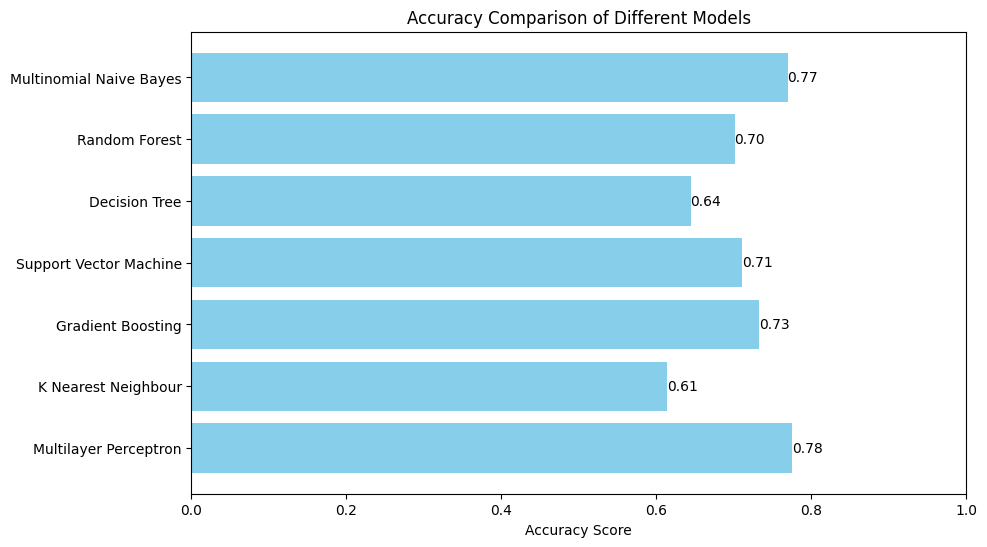

In [34]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Collect accuracy scores
models = ['Multinomial Naive Bayes', 'Random Forest', 'Decision Tree',
          'Support Vector Machine', 'Gradient Boosting', 'K Nearest Neighbour',
          'Multilayer Perceptron']
scores = [accuracy_score(y_test, predmnb),
          accuracy_score(y_test, predrmfr),
          accuracy_score(y_test, preddt),
          accuracy_score(y_test, predsvm),
          accuracy_score(y_test, predgbi),
          accuracy_score(y_test, predknn),
          accuracy_score(y_test, predmlp)]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.barh(models, scores, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Accuracy Comparison of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy on top

# Add scores on the edges
for bar, score in zip(bars, scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.2f}',
             va='center', ha='left')

plt.show()


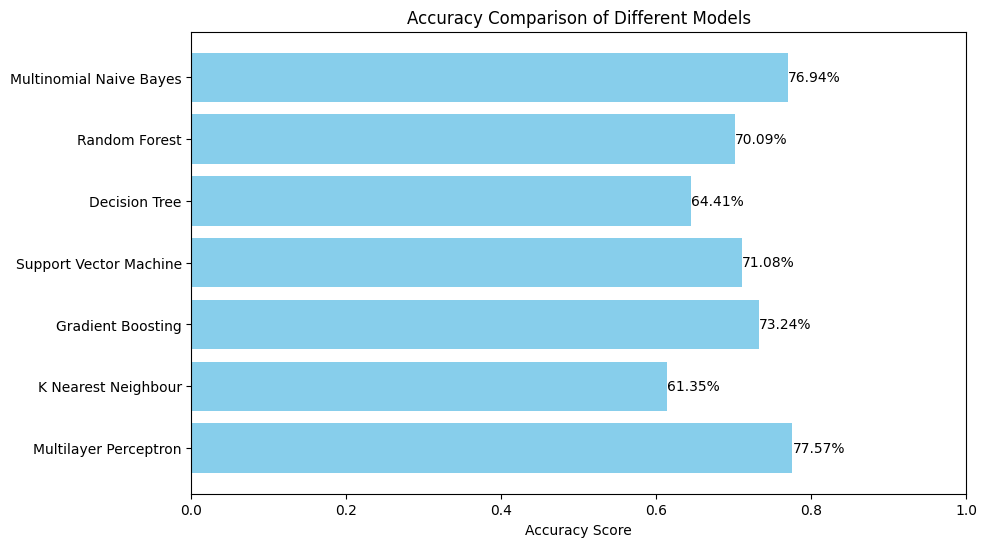

In [35]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Collect accuracy scores
models = ['Multinomial Naive Bayes', 'Random Forest', 'Decision Tree',
          'Support Vector Machine', 'Gradient Boosting', 'K Nearest Neighbour',
          'Multilayer Perceptron']
scores = [accuracy_score(y_test, predmnb),
          accuracy_score(y_test, predrmfr),
          accuracy_score(y_test, preddt),
          accuracy_score(y_test, predsvm),
          accuracy_score(y_test, predgbi),
          accuracy_score(y_test, predknn),
          accuracy_score(y_test, predmlp)]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.barh(models, scores, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Accuracy Comparison of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy on top

# Add scores (percentage values) on the edges
for bar, score in zip(bars, scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score*100:.2f}%',
             va='center', ha='left')

plt.show()


In [36]:
# Define positive and negative thresholds
genuine_threshold = 4
fake_threshold = 2

# Count positive and negative reviews
genuine_reviews = data[data['stars'] >= genuine_threshold].shape[0]
fake_reviews = data[data['stars'] <= fake_threshold].shape[0]

# Print the counts
print(f"Number of Genuine reviews: {genuine_reviews}")
print(f"Number of Fake reviews: {fake_reviews}")

Number of Genuine reviews: 6863
Number of Fake reviews: 1676


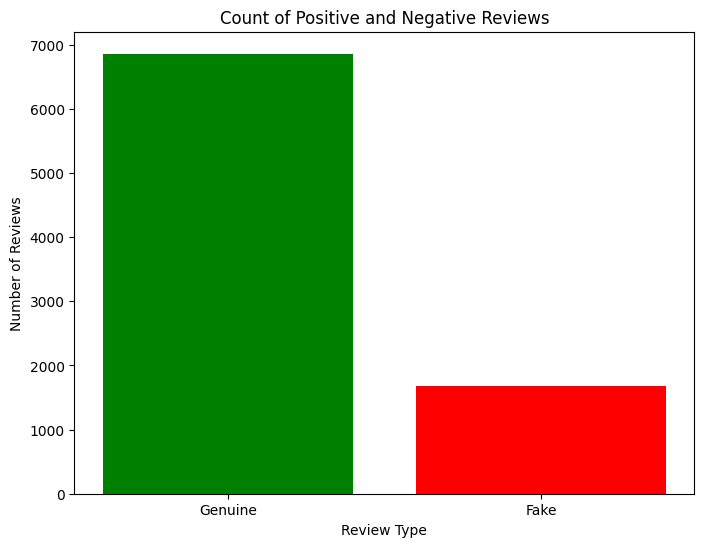

In [37]:
# Data for plotting
reviews = ['Genuine', 'Fake']
counts = [genuine_reviews, fake_reviews]

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(reviews, counts, color=['green', 'red'])
plt.xlabel('Review Type')
plt.ylabel('Number of Reviews')
plt.title('Count of Positive and Negative Reviews')
plt.show()

In [38]:
# POSITIVE REVIEW
pr = data['text'][0]
print(pr)
print("Actual Rating: ",data['stars'][0])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mlp.predict(pr_t)[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
Actual Rating:  5
Predicted Rating:


5

In [39]:
# AVERAGE REVIEW
ar = data['text'][16]
print(ar)
print("Actual Rating: ",data['stars'][16])
ar_t = vocab.transform([ar])
print("Predicted Rating:")
mlp.predict(ar_t)[0]

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

Predicted Rating:


3

In [40]:
# NEGATIVE REVIEW
nr = data['text'][16]
print(nr)
print("Actual Rating: ",data['stars'][23])
nr_t = vocab.transform([nr])
print("Predicted Rating:")
mlp.predict(nr_t)[0]

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

3

In [41]:
count = data['stars'].value_counts()
print(count)

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64


From the above, we can see that predictions are biased towards positive reviews. We can see that the dataset has more positive reviews as compared to negative reviews. <br>
I think I can fix it by normalizing the dataset to have equal number of reviews - thereby removing the bias.

In [42]:
import pickle
with open('model_review.pkl', 'wb') as file:
    pickle.dump(mnb, file)

In [43]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install --upgrade pip


In [45]:
import gradio as gr
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Load your trained model from a .pkl file
with open('model_review.pkl', 'rb') as file:
    model = pickle.load(file)

# Load or define your CountVectorizer
# Assuming you have saved your vectorizer as a .pkl file
with open('model_review_vectorization.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

def preprocess(text):
    """
    Function to preprocess the text
    - This should match the preprocessing applied during the model training phase
    """
    # Example of preprocessing: vectorizing the text using the loaded CountVectorizer
    return vectorizer.transform([text])

def fake_review_detection(review):
    processed_review = preprocess(review)
    prediction = model.predict(processed_review)
    result=float(prediction)


    if result>4:
        feedback = "5 - Seems like a genuine review."
    else:
        feedback = "1 - Seems like a fake review."

    return feedback


iface = gr.Interface(fn=fake_review_detection,
                     inputs=gr.Textbox(lines=7, placeholder="Enter the review text here..."),
                     outputs="text",
                     title="Fake Review Detection",
                     description="This tool predicts whether a review is fake or genuine. Enter a review text to check.")
# Launch the application
iface.launch(inbrowser=True,debug=True,share=True)


c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


C:\Users\Kumar\AppData\Local\Temp\ipykernel_10864\3958972063.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result=float(prediction)
